In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
     

In [4]:
data=pd.read_csv('mnist_train.csv')


In [5]:
rand=np.random.randint(0,data.shape[0],10000)
data=data.iloc[rand,:].reset_index()
data.drop(columns='index',inplace=True)
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
labels=data.iloc[:,0]
data=data.drop(columns='label',axis=1)
print(labels.shape)
print(data.shape)

(10000,)
(10000, 784)


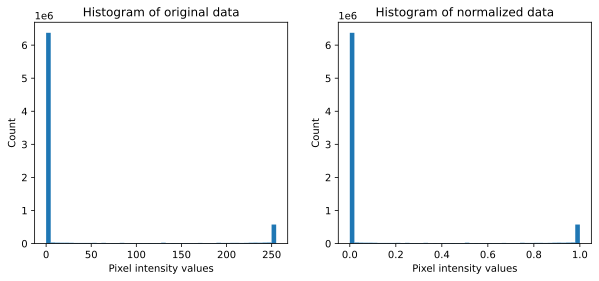

In [7]:
dataNorm = data/np.max(data)

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(data.values.flatten(),50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')

ax[1].hist(dataNorm.values.flatten(),50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')

plt.show()

In [8]:
dataT   = torch.tensor( dataNorm.values ).float()
labelsT = torch.tensor( labels ).long()

# Step 2: use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.1)


# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])
     

In [51]:
# create a class for the model
def createTheMNISTNet():

    class mnistNet(nn.Module):
        def __init__(self):
            super().__init__()

              ### input layer
            self.input = nn.Linear(784,64)

              ### hidden layer
            self.fc1 = nn.Linear(64,32)
            self.fc2 = nn.Linear(32,32)

              ### output layer
            self.output = nn.Linear(32,10)

    # forward pass
        def forward(self,x):
            x = F.relu( self.input(x) )
            x = F.relu( self.fc1(x) )
            x = F.relu( self.fc2(x) )
            return (self.output(x))
          # NOTE: log-softmax the output (b/c loss function)

  # create the model instance
    net = mnistNet()
  
  # loss function
    lossfun = nn.CrossEntropyLoss()

  # optimizer
    optimizer = torch.optim.SGD(net.parameters(),lr=.01)

    return net,lossfun,optimizer
     


In [52]:
# test the model with one batch
net,lossfun,optimizer = createTheMNISTNet()

X,y = next(iter(train_loader))
yHat = net(X)

# confirm really binary
torch.unique(X)
     

tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314,
        0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667,
        0.0706, 0.0745, 0.0784, 0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020,
        0.1059, 0.1098, 0.1137, 0.1176, 0.1216, 0.1255, 0.1294, 0.1333, 0.1373,
        0.1412, 0.1451, 0.1490, 0.1529, 0.1569, 0.1608, 0.1647, 0.1686, 0.1725,
        0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039, 0.2078,
        0.2118, 0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431,
        0.2471, 0.2510, 0.2549, 0.2588, 0.2627, 0.2667, 0.2706, 0.2745, 0.2784,
        0.2824, 0.2863, 0.2902, 0.2941, 0.2980, 0.3020, 0.3059, 0.3098, 0.3137,
        0.3176, 0.3216, 0.3255, 0.3294, 0.3333, 0.3373, 0.3412, 0.3451, 0.3490,
        0.3529, 0.3569, 0.3608, 0.3647, 0.3686, 0.3725, 0.3765, 0.3804, 0.3843,
        0.3882, 0.3922, 0.3961, 0.4000, 0.4039, 0.4078, 0.4118, 0.4157, 0.4196,
        0.4235, 0.4275, 0.4314, 0.4353, 

In [13]:
# print('summary of model')
# print(net)
# print()
# print('summary of the input layer:')
# print(vars(net.input))
# print()
print('Input layer weights:')
print(net.input.weight.shape)
print(net.input.weight)
print()


Input layer weights:
torch.Size([64, 784])
Parameter containing:
tensor([[-0.0279,  0.0015, -0.0143,  ..., -0.0137, -0.0354,  0.0188],
        [-0.0263, -0.0164,  0.0059,  ...,  0.0079, -0.0303, -0.0049],
        [ 0.0239,  0.0103, -0.0355,  ...,  0.0133,  0.0025, -0.0029],
        ...,
        [-0.0079, -0.0193,  0.0106,  ..., -0.0129, -0.0181, -0.0124],
        [ 0.0134, -0.0317, -0.0004,  ...,  0.0173,  0.0006,  0.0346],
        [ 0.0133, -0.0349,  0.0255,  ...,  0.0110,  0.0009,  0.0350]],
       requires_grad=True)



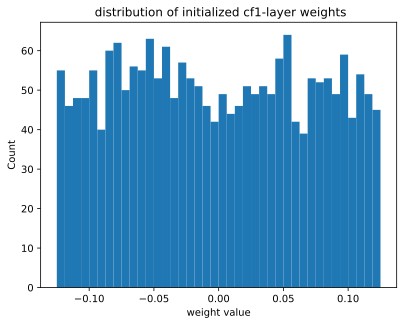

In [16]:
w=net.fc1.weight.detach().flatten()

plt.hist(w,bins=40)
plt.xlabel('weight value')
plt.ylabel('Count')
plt.title(' distribution of initialized cf1-layer weights')
plt.show()

(100,)
(100,)


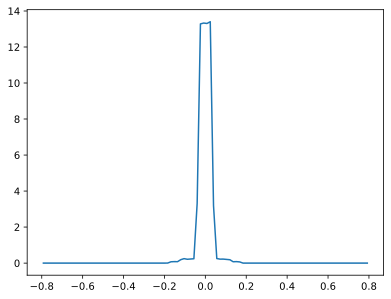

In [53]:
def weightsHistogram(net):
    W=np.array([])
    for layer in net.parameters():
        W=np.concatenate((W, layer.detach().flatten().numpy()))
    histy,histx=np.histogram(W,bins=np.linspace(-0.8,0.8,101),density=True)
    histx=(histx[1:]+histx[:-1])/2
    return histx,histy

histx,histy=weightsHistogram(net)
plt.plot(histx,histy)
print(histx.shape)
print(histy.shape)

In [29]:
for layer in net.parameters():
    print(layer)

Parameter containing:
tensor([[-0.0279,  0.0015, -0.0143,  ..., -0.0137, -0.0354,  0.0188],
        [-0.0263, -0.0164,  0.0059,  ...,  0.0079, -0.0303, -0.0049],
        [ 0.0239,  0.0103, -0.0355,  ...,  0.0133,  0.0025, -0.0029],
        ...,
        [-0.0079, -0.0193,  0.0106,  ..., -0.0129, -0.0181, -0.0124],
        [ 0.0134, -0.0317, -0.0004,  ...,  0.0173,  0.0006,  0.0346],
        [ 0.0133, -0.0349,  0.0255,  ...,  0.0110,  0.0009,  0.0350]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0025,  0.0151, -0.0278,  0.0229,  0.0124,  0.0085,  0.0284,  0.0148,
         0.0159, -0.0033, -0.0178, -0.0033,  0.0094, -0.0011,  0.0336,  0.0265,
         0.0214, -0.0292, -0.0120, -0.0034, -0.0228,  0.0297,  0.0323, -0.0124,
         0.0281, -0.0208, -0.0022,  0.0267, -0.0074,  0.0120,  0.0182, -0.0170,
         0.0150,  0.0247, -0.0247, -0.0254,  0.0266, -0.0336,  0.0296,  0.0113,
         0.0185, -0.0171, -0.0119,  0.0249,  0.0009,  0.0217, -0.0114, -0.0225,
         0.0332

In [54]:
def function2trainTheModel():

      # number of epochs
    numepochs = 100 

      # create a new model
    net,lossfun,optimizer = createTheMNISTNet()

      # initialize losses
    losses    = torch.zeros(numepochs)
    trainAcc  = []
    testAcc   = []
    histx=np.zeros((numepochs,100))
    histy=np.zeros((numepochs,100))


      # loop over epochs
    for epochi in range(numepochs):
        
        histx,histy[epochi,:]=weightsHistogram(net)
        # loop over training data batches
        batchAcc  = []
        batchLoss = []
        for X,y in train_loader:

          # forward pass and loss
            yHat = net(X)
            loss = lossfun(yHat,y)

          # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

          # loss from this batch
            batchLoss.append(loss.item())

          # compute accuracy
            matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
            matchesNumeric = matches.float()             # convert to numbers (0/1)
            accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
            batchAcc.append( accuracyPct )               # add to list of accuracies
        # end of batch loop...

        # now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.mean(batchAcc) )

        # and get average losses across the batches
        losses[epochi] = np.mean(batchLoss)

        # test accuracy
        X,y = next(iter(test_loader)) # extract X,y from test dataloader
        with torch.no_grad(): # deactivates autograd
            yHat = net(X)

        # compare the following really long line of code to the training accuracy lines
        testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

      # end epochs
    return trainAcc,testAcc,losses,net,histx,histy


In [55]:


trainAcc,testAcc,losses,net,histx,histy = function2trainTheModel()

     


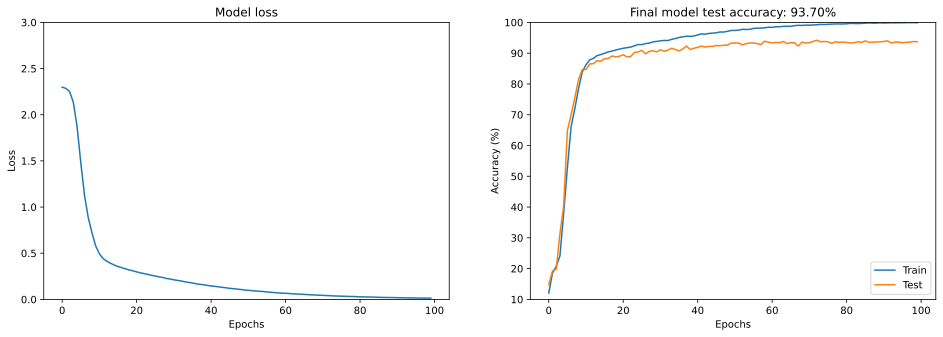

In [56]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()
     

Text(0, 0.5, 'Training epoch')

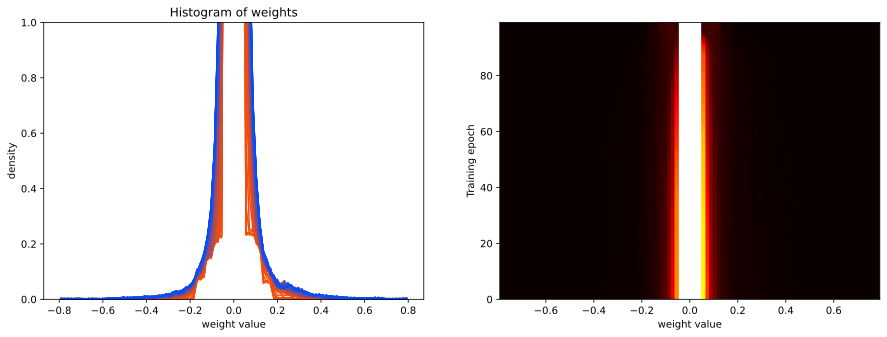

In [59]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
for i in range(histy.shape[0]):
    ax[0].plot(histx,histy[i,:],color=[1-i/100,0.3,i/100])
ax[0].set_title('Histogram of weights')
ax[0].set_xlabel('weight value')
ax[0].set_ylabel('density')
ax[0].set_ylim([0,1])

ax[1].imshow(histy,vmin=0,vmax=3,aspect='auto',cmap='hot',origin='upper',
            extent=[histx[0],histx[-1],0,99])
ax[1].set_xlabel('weight value')
ax[1].set_ylabel('Training epoch')